【課程名稱】<font color=#FF0000>機器學習(Machine Learning, ML)</font><br>
【授課講師】[陳祥輝 (mail : HsiangHui.Chen@gmail.com)](mailto:HsiangHui.Chen@gmail.com)<br>
【facebook】[陳祥輝老師的臉書 (歡迎加好友)](https://goo.gl/osivhx)<br>
【相關課程】[東吳推廣數位資訊學苑陳祥輝老師的課程表](https://www.ext.scu.edu.tw/courses_search.php?key=陳祥輝)<br>

In [ ]:
# !pip install --upgrade seaborn

In [2]:
# -*- coding: utf-8 -*-
from platform import python_version
import os, time, glob, socket, pickle, joblib
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Lasso, Ridge

import scipy
from scipy.stats import linregress

print("【日期時間】{}".format(time.strftime("%Y/%m/%d %H:%M:%S")))
print("【工作目錄】{}".format(os.getcwd()))
print("【主機名稱】{} ({})".format(socket.gethostname(),socket.gethostbyname(socket.gethostname())))
print("【Python】{}".format(python_version()))
print("【matplotlib】{}".format(mpl.__version__))
print("【seaborn】{}".format(sns.__version__))
print("【sklearn】{}".format(sklearn.__version__))
print("【scipy】{}".format(scipy.__version__))

# %autosave 120

【日期時間】2025/03/14 18:54:04
【工作目錄】C:\Users\NTPU\Downloads
【主機名稱】502-12 (10.100.52.12)
【Python】3.12.4
【matplotlib】3.8.4
【seaborn】0.13.2
【sklearn】1.4.2
【scipy】1.13.1


In [6]:
from matplotlib.font_manager import FontProperties  
winfont01 = FontProperties(fname=r"c:\windows\fonts\simsun.ttc", size=12) 
winfont02 = FontProperties(fname=r"c:\windows\fonts\kaiu.ttf", size=12) 

# macfont = FontProperties(fname="/Library/Fonts/Arial Unicode.ttf", size=10) 

【資料來源】<http://rasbt.github.io/mlxtend/user_guide/regressor/LinearRegression/>

<img src='http://rasbt.github.io/mlxtend/user_guide/regressor/LinearRegression_files/simple_regression.png' width=400 align=left></img>   

- <http://rasbt.github.io/mlxtend/user_guide/regressor/LinearRegression_files/simple_regression.png>
- SST(Total Sum of Squares) (總平方和，總變異) : $SST = \sum (y_i - \bar y)^2$
- SSE(<u>S</u>um of <u>S</u>quared <u>E</u>rrors) (誤差平方和) : $SSE = \sum_{i=1}^{n} (y_i - \hat y_i)^2$
    - 也稱之為，殘差平方和(Residual Sum of Squares)
- 無法解釋的變異比例 : $\frac{SSE}{SST}$
- 可以解釋的變異比例，判定係數（英語：coefficient of determination) : $R^2 = 1 - \frac{SSE}{SST}$
- MSE(<u>M</u>ean <u>S</u>quared <u>E</u>rror) : $\frac{1}{n}\times SSE$
- RMSE(<u>R</u>oot-<u>M</u>ean-<u>S</u>quare <u>E</u>rror) : $\sqrt {\frac{1}{n}\times SSE}$
- MAE(<u>M</u>ean <u>A</u>bsolute <u>E</u>rror) : $\frac{\sum |y_i - \hat y_i|}{n}$

### <font color=#0000FF>Linear Regression</font>
- OLS(Ordinary Least Squares)最小平方
    - loss function : $minimize\{SSE = \sum_{i=1}^n(y_i-\hat y_i)^2\}$
- model function
    - $y = \beta_0 + \beta_1 x_1 + \epsilon$
        - $y$ : 反應變數(又稱為應變項)
        - $x_i$ : 預測變數(又稱為自變項)
        - $\beta_0$ : 截距項(intercept)
        - $\beta_1$ : 斜率(slope)、權重(模型欲估計的參數)
        - $\hat y = \hat \beta_0 + \hat \beta_1 x_1$        
            - $\hat y、 \hat \beta_0、 \hat \beta_1$ : 被算(預測)出來的估計值(頭頂上多一頂帽子^)
    - $y = \beta_0 + \beta_1*x_1 + \beta_2*x_2 + ... + \epsilon$

In [7]:
fname1 = r"C:\Data\PyMLData\cars.csv"
fname2 = r"C:\Data\PyMLData\mtcars.csv"

cars   = pd.read_csv(fname1,sep=',',engine='python',encoding='cp950')
mtcars = pd.read_csv(fname2,sep=',',engine='python',encoding='cp950')

老師說他會先看看它的形狀

In [6]:
print("cars :", cars.shape)
print("mtcars :", mtcars.shape)

cars : (50, 2)
mtcars : (32, 11)


再看看他前面幾筆長怎樣

In [7]:
print(cars.head(3))
print(mtcars.head(3))

   speed  dist
0      4     2
1      4    10
2      7     4
    mpg  cyl   disp   hp  drat     wt   qsec  vs  am  gear  carb
0  21.0    6  160.0  110  3.90  2.620  16.46   0   1     4     4
1  21.0    6  160.0  110  3.90  2.875  17.02   0   1     4     4
2  22.8    4  108.0   93  3.85  2.320  18.61   1   1     4     1


順便看看有沒有遺失值

In [8]:
print(cars.isna().sum(axis=0))        # axis = 0 : 代表列運算, axis = 1 : 代表行運算
print("-------------")
print(mtcars.isna().sum(axis=0))

speed    0
dist     0
dtype: int64
-------------
mpg     0
cyl     0
disp    0
hp      0
drat    0
wt      0
qsec    0
vs      0
am      0
gear    0
carb    0
dtype: int64


【cars資料集】
- speed : numeric Speed (mph) 速度（mph, miles per hour 英里）
- dist : numeric Stopping distance (ft) 停止距離（ft, 英尺）

【mtcars資料集】
- mpg : Miles/(US) gallon 英里/（美國）加侖
- cyl : Number of cylinders 氣缸數
- disp : Displacement (cu.in.) 位移（cu.in.）
- hp : Gross horsepower 總馬力 
- drat : Rear axle ratio 後橋比
- wt : Weight (1000 lbs) 重量（1000 lbs）
- qsec : 1/4 mile time 1/4英里時間
- vs : Engine (0 = V-shaped, 1 = straight) 引擎 (0 = V形，1 =直)
- am : Transmission (0 = automatic, 1 = manual) 傳動 (0 =自動，1 =手動)
- gear : Number of forward gears 齒輪前進檔數
- carb : Number of carburetors 碳氫化合物數量

### <font color=blue>Exploratory Data Analysis 探索性分析, EDA</font>

大多就是看看他的圖表 等等的

In [9]:
# 先看看相關係數
cars.corr()

,speed,dist
speed,1.000000,0.806895
dist,0.806895,1.000000


In [10]:
mtcars.corr()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
mpg,1.000000,-0.852162,-0.847551,-0.776168,0.681172,-0.867659,0.418684,0.664039,0.599832,0.480285,-0.550925
cyl,-0.852162,1.000000,0.902033,0.832447,-0.699938,0.782496,-0.591242,-0.810812,-0.522607,-0.492687,0.526988
disp,-0.847551,0.902033,1.000000,0.790949,-0.710214,0.887980,-0.433698,-0.710416,-0.591227,-0.555569,0.394977
hp,-0.776168,0.832447,0.790949,1.000000,-0.448759,0.658748,-0.708223,-0.723097,-0.243204,-0.125704,0.749812
drat,0.681172,-0.699938,-0.710214,-0.448759,1.000000,-0.712441,0.091205,0.440278,0.712711,0.699610,-0.090790
wt,-0.867659,0.782496,0.887980,0.658748,-0.712441,1.000000,-0.174716,-0.554916,-0.692495,-0.583287,0.427606
qsec,0.418684,-0.591242,-0.433698,-0.708223,0.091205,-0.174716,1.000000,0.744535,-0.229861,-0.212682,-0.656249
vs,0.664039,-0.810812,-0.710416,-0.723097,0.440278,-0.554916,0.744535,1.000000,0.168345,0.206023,-0.569607
am,0.599832,-0.522607,-0.591227,-0.243204,0.712711,-0.692495,-0.229861,0.168345,1.000000,0.794059,0.057534
gear,0.480285,-0.492687,-0.555569,-0.125704,0.699610,-0.583287,-0.212682,0.206023,0.794059,1.000000,0.274073


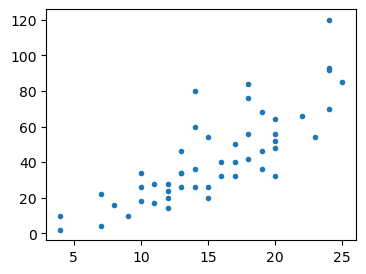

In [11]:
plt.figure(figsize=[4, 3])
plt.scatter(x=cars["speed"], y=cars["dist"], marker=".")
plt.show()

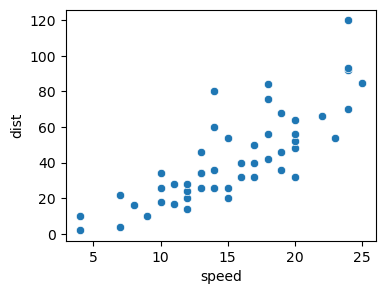

In [12]:
plt.figure(figsize=[4, 3])
sns.scatterplot(data=cars, x="speed", y="dist")
plt.show()

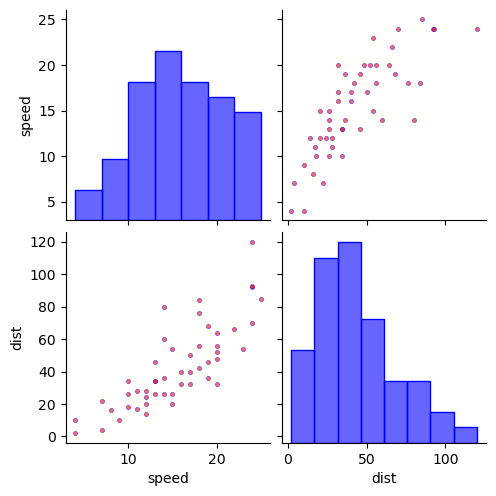

In [13]:
sns.pairplot(data=cars, 
             plot_kws={"color":"red", "edgecolor":"blue", "alpha":0.6, "marker":"."},
             diag_kws={"color":"blue", "edgecolor":"blue", "alpha":0.6},)
plt.show()

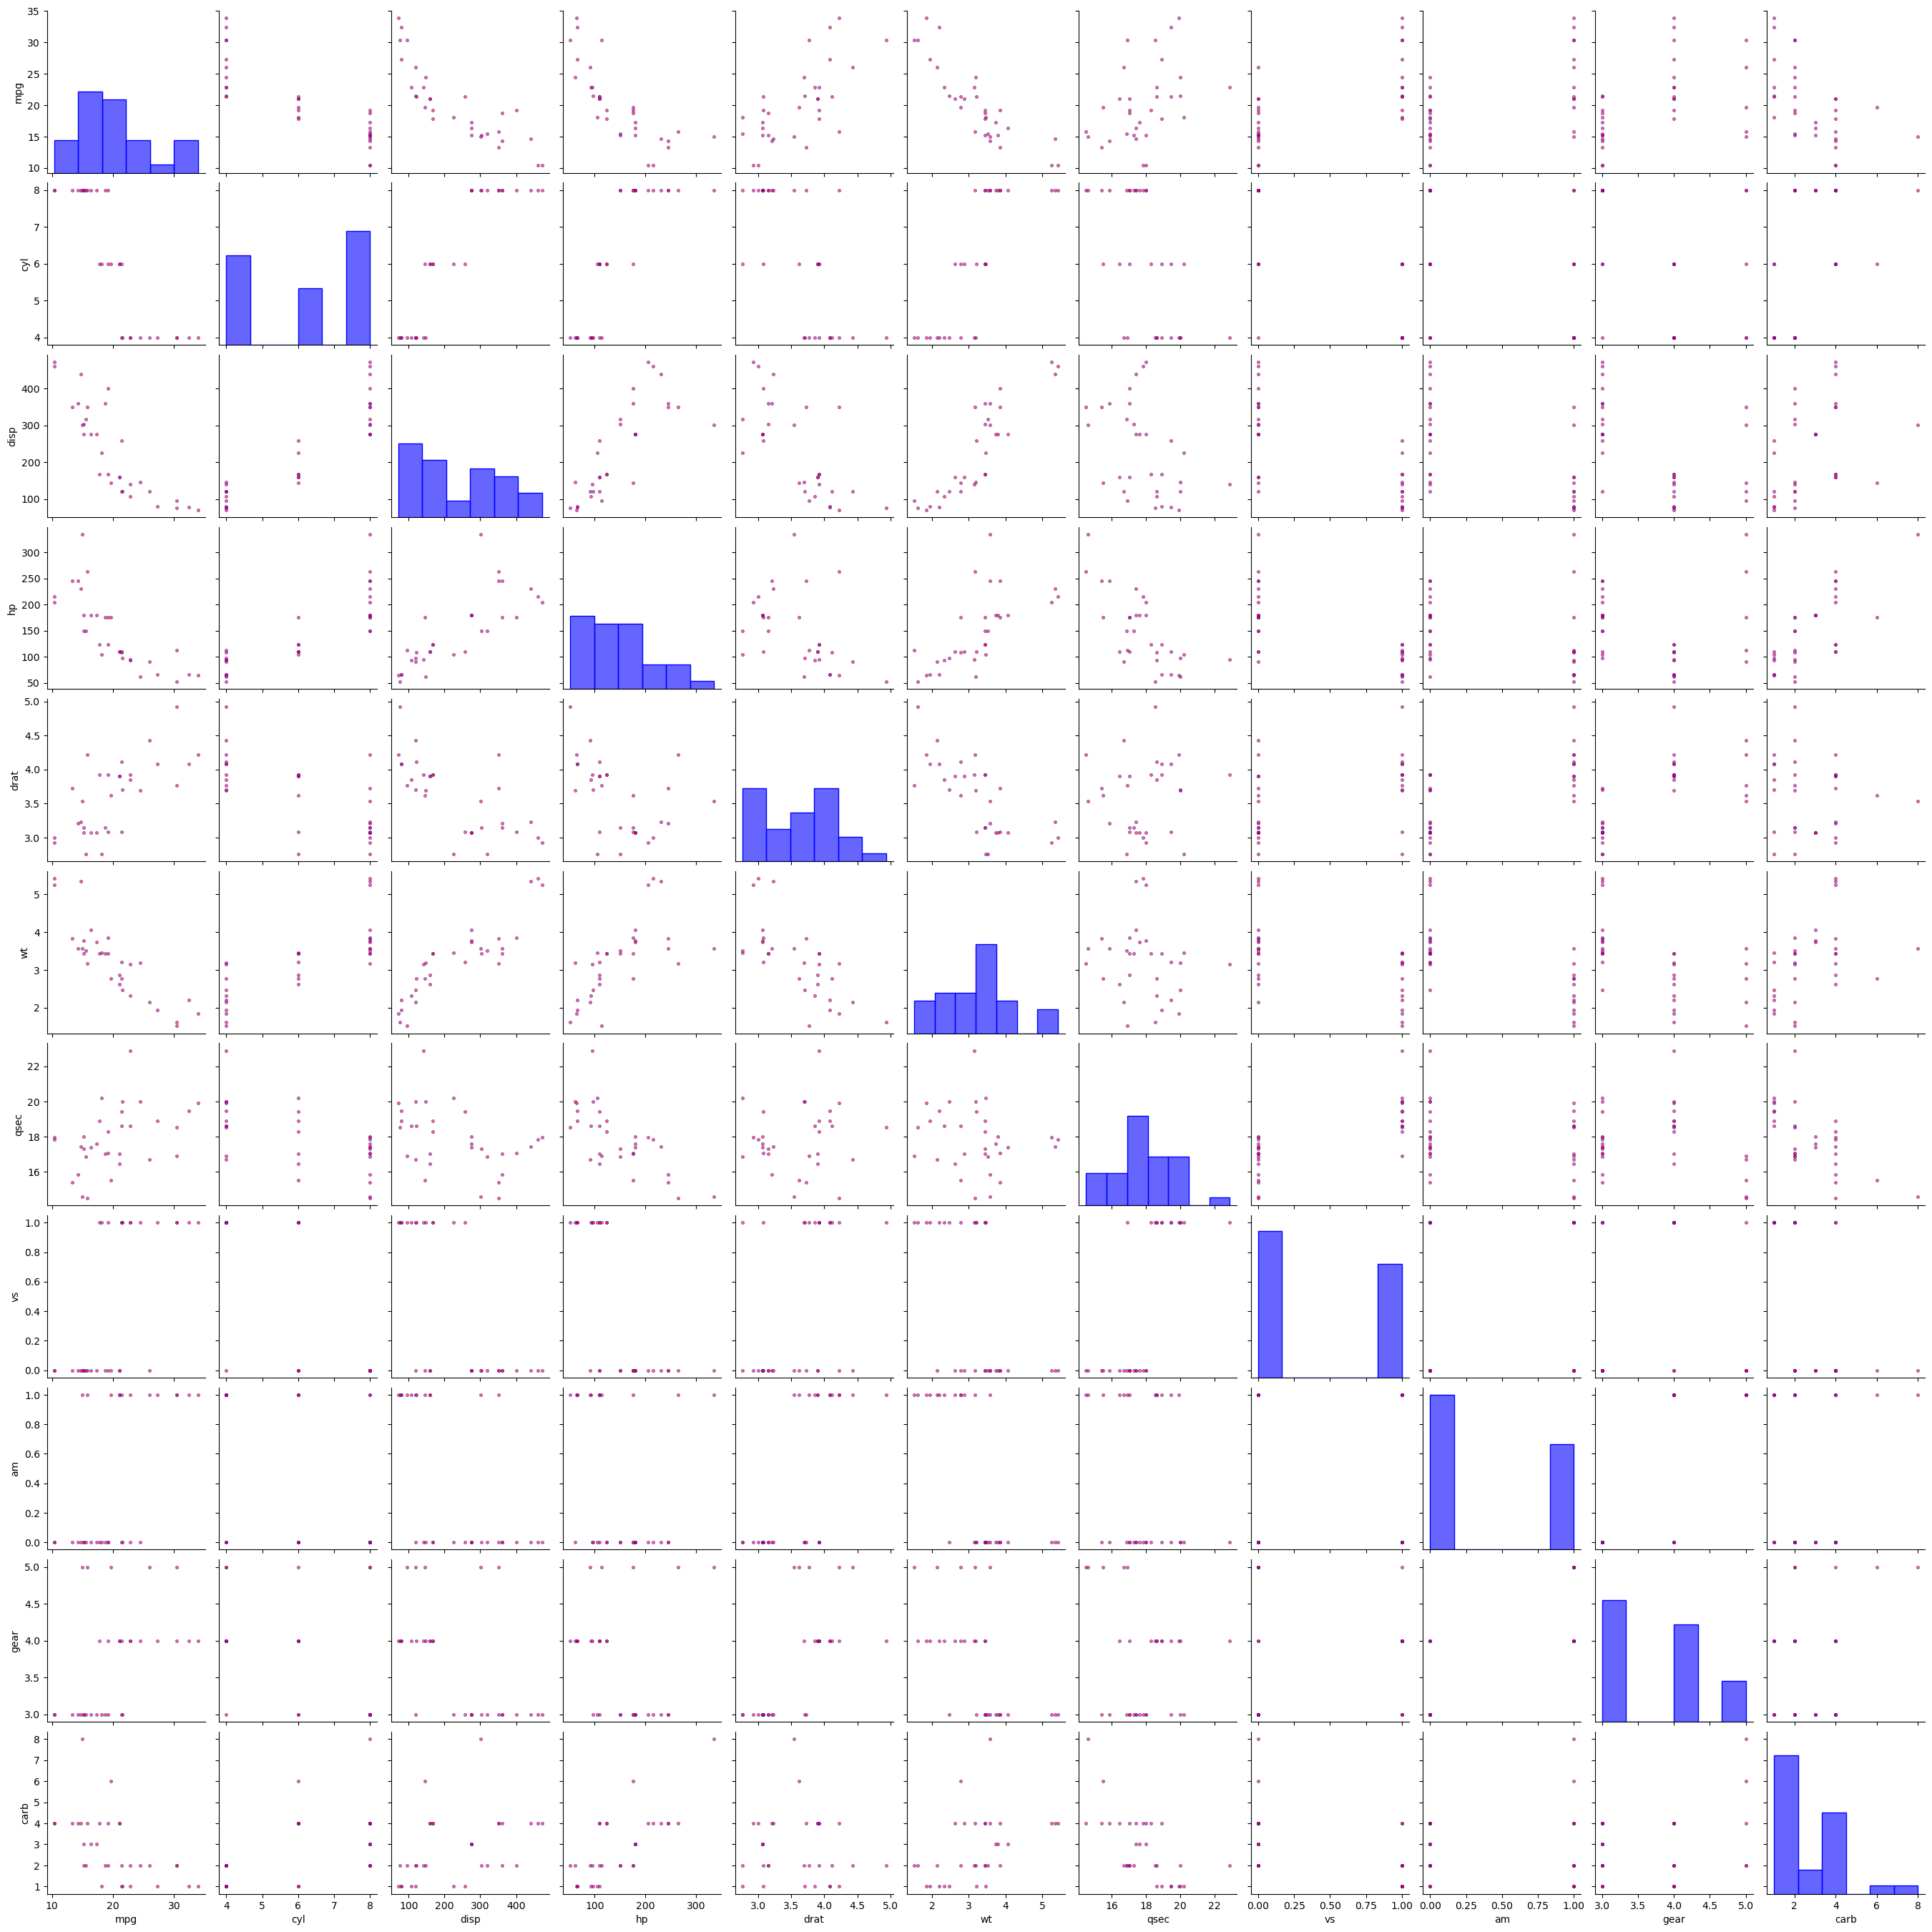

In [14]:
sns.pairplot(data=mtcars, 
             plot_kws={"color":"red", "edgecolor":"blue", "alpha":0.6, "marker":"."},
             diag_kws={"color":"blue", "edgecolor":"blue", "alpha":0.6},)
plt.show()

### <font color=#FF0000>Simple Regression</font>

老師說再複習的時候這樣不用在重頭來一次

1. 看看形狀 看看欄位名 看看前三筆資料
2. 把 X y 定義好來
3. 切割 train test ( 老師說她多半會 80% 20% 切

> #### <font color=blue>step 1 : 讀入資料集</font>

In [16]:
fname1 = r"C:\Data\PyMLData\cars.csv"
cars   = pd.read_csv(fname1,sep=',',engine='python',encoding='cp950')

# 看看形狀 看看欄位名 看看前三筆資料
print("cars :", cars.shape)
print("columns :", cars.columns)
cars.head(3)

cars : (50, 2)
columns : Index(['speed', 'dist'], dtype='object')


,speed,dist
0,4,2
1,4,10
2,7,4


> #### <font color=blue>step 2 : 縱向切割 X, y</font>

<font color=red>【補充說明】函數中的參數中，如果有 :</font>


*  / : 位置參數(positional argument)，/ 之前的參數，不可以有參數名稱
*  \* : 關鍵參數(keyword argument)，* 之後的參數，一定要有參數名稱

In [28]:
# X = cars.iloc[:, 0].values        # 舊的寫法，轉換成 array
X = cars.iloc[:, 0].to_numpy()      # 新的寫法，轉換成 array
y = cars["dist"]

X = X.reshape((-1, 1))              # 將1-D改成2-D
print(X.shape)
print(y.shape)

(50, 1)
(50,)


> #### <font color=blue>step 3 : 橫向切割 train, test 資料集</font>

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2,     # int : 測試集的筆數，float : 測試集的百分比
                                                    train_size=None,   # test_size, train_size 只能擇一設定
                                                    random_state=42,   # seed 要設定好每一次切的才會是一樣的 如果none就會不一樣了
                                                    shuffle=True,      # 順序是否打亂
                                                    stratify=None,)    # 分層抽樣的依據

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(40, 1)
(40,)
(10, 1)
(10,)


> #### <font color=blue>step 4 : 建立模型(產生物件)</font>

In [19]:
print("本機核心數 :", os.cpu_count())

本機核心數 : 12


In [26]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True,
                         copy_X=True,
                         n_jobs=-1,         # 使用所有的核心數
                         positive=False,)

> #### <font color=blue>step 5 : 配適(fit)、訓練模型</font>

In [27]:
model.fit(X_train, y_train)

LinearRegression(n_jobs=-1)

In [29]:
print(model.intercept_)   # b0 beta
print(model.coef_)        # b1

-14.133882307411127
[3.68568726]


In [30]:
print(f"y = {model.intercept_} + {model.coef_[0]}*x")

y = -14.133882307411127 + 3.685687256777965*x


> #### <font color=blue>step 6 : 評估模型 : 查看 $R^2$</font>

In [34]:
import time
start_time = time.time()
print(f"train R2 : {model.score(X_train, y_train):.3f}")
print(f"test R2 : {model.score(X_test, y_test):.3f}")

end_time = time.time()
execution_time = end_time - start_time
print("model.score 程式執行時間：", execution_time, "秒")

train R2 : 0.645
test R2 : 0.616
程式執行時間： 0.00527501106262207 秒


In [35]:
from sklearn.metrics import mean_squared_error, r2_score, root_mean_squared_error
import time
start_time = time.time()
print(f"train R2 : {r2_score(y_true=y_train, y_pred=model.predict(X_train)):.3f}")
print(f"test R2 : {r2_score(y_true=y_test, y_pred=model.predict(X_test)):.3f}")

end_time = time.time()
execution_time = end_time - start_time
print("r2_score 程式執行時間：", execution_time, "秒")

train R2 : 0.645
test R2 : 0.616
程式執行時間： 0.016086339950561523 秒


兩個結果是一樣的 老師只是想展示一下 它們是一樣ㄉ 上面的計算出來比下面的要快很多!!!  <br>
以後要用model.score 嘻嘻 <br>
但是想想也是 因為下面的要在predict一次

> #### <font color=blue>step 7 : 模型預測</font>

In [33]:
y_hat = model.predict(X_test)
print(y_hat)

[30.09436477 59.57986283 48.52280106 74.32261186 33.78005203 74.32261186
 44.8371138  41.15142654 52.20848831 37.46573929]


看看預測的結果 一次最簡單的回歸就結束惹

#### <font color='blue'>【驗證資料】</font>
- 殘差平方和 : $SSE = \sum_{i=1}^{n} (\hat y_i - y_i)^2$，就是 `_residues`
- 總變異 : $SST = \sum (y_i - \bar y)^2$
- 無法解釋的變異比例 : $\frac{SSE}{SST}$
- 判定係數(coefficient of determination) : $R^2 = 1 - \frac{SSE}{SST}$

In [36]:
y_hat = model.predict(X_train)
sse = sum((y_train - y_hat)**2)
print(sse)

8688.901550170925


In [37]:
sst = sum((y_train - y_train.mean())**2)
print(sst)

24484.375


In [38]:
1 - (sse/sst)

0.6451246335603451

### <font color='red'>如何利用<u>重複抽樣(Resampling)</u>以及<u>大數法則(Law of large numbers, LLN)</u>來看模型穩定性(Stability)</font>

In [45]:
fname1 = r"C:\Data\PyMLData\cars.csv"
cars   = pd.read_csv(fname1,sep=',',engine='python',encoding='cp950')

X = cars.iloc[:, 0].to_numpy()      # 新的寫法，轉換成 array
y = cars["dist"]

X = X.reshape((-1, 1))              # 將1-D改成2-D

平均數 : 0.6526297758222726
標準差 : 0.03841657713822522


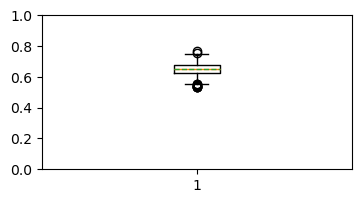

In [46]:
n_epochs = 1000
R2 = list()
model = LinearRegression(fit_intercept=True,
                         copy_X=True,
                         n_jobs=-1,         # 使用所有的核心數
                         positive=False,)

for epoch in range(n_epochs) :
    X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2,     # int : 測試集的筆數，float : 測試集的百分比
                                                    train_size=None,   # test_size, train_size 只能擇一設定
                                                    random_state=None, # seed
                                                    shuffle=True,      # 順序是否打亂
                                                    stratify=None,)    # 分層抽樣的依據
    model.fit(X_train, y_train)
    R2.append(model.score(X_train, y_train))

print("平均數 :", np.mean(R2))
print("標準差 :", np.std(R2))

plt.figure(figsize=[4, 2])
plt.boxplot(R2, 
            meanline=True,          # 是否繪製平均線
            showmeans=True,         # 是否顯示平均數
            showfliers=True)        # 是否繪製離群值，1.5 IQR 之外的
plt.ylim(0, 1)
plt.show()

我自己寫的本來以為是這個樣子ㄉ

{'whiskers': [<matplotlib.lines.Line2D at 0x1b08372db20>,
 'caps': [<matplotlib.lines.Line2D at 0x1b08372dfa0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b08372d8b0>],
 'medians': [<matplotlib.lines.Line2D at 0x1b08372e5a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1b08372e8a0>],
 'means': []}

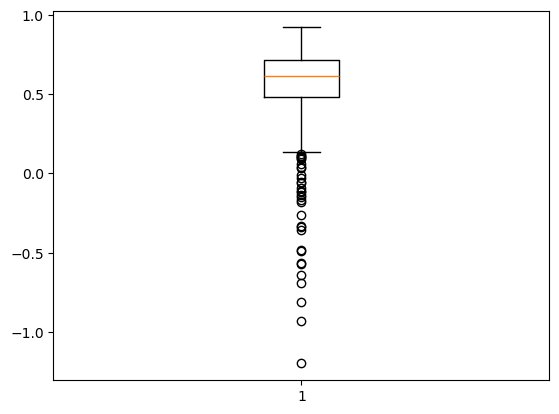

In [47]:
res_list = list()
for i in range(1000):
    X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X, y, 
                                                        test_size=0.2,     # int : 測試集的筆數，float : 測試集的百分比
                                                        train_size=None,   # test_size, train_size 只能擇一設定
                                                        random_state=i,   # seed
                                                        shuffle=True,      # 順序是否打亂
                                                        stratify=None,)    # 分層抽樣的依據
    # print(f"test R2 : {model.score(X_test_1, y_test_1):.3f}")
    res_list.append(model.score(X_test_1, y_test_1))
plt.boxplot(res_list)

### <font color=#FF0000>Complex Regression</font>

> #### <font color=blue>step 1 : 讀入資料集</font>

In [48]:
fname2 = r"C:\Data\PyMLData\mtcars.csv"
mtcars   = pd.read_csv(fname2,sep=',',engine='python',encoding='cp950')

print("mtcars :", mtcars.shape)
print("columns :", mtcars.columns)
mtcars.head(3)

mtcars : (32, 11)
columns : Index(['mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear',
       'carb'],
      dtype='object')


,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1


> #### <font color=blue>step 2 : 縱向切割 X, y</font>

In [49]:
X = mtcars.drop(["mpg"], axis=1, inplace=False).to_numpy()   # axis=0 代表列, axis=1 代表行
y = mtcars["mpg"].to_numpy()

# X = X.reshape((-1, 1))              # 將1-D改成2-D
print(X.shape)
print(y.shape)

(32, 10)
(32,)


> #### <font color=blue>step 3 : 橫向切割 train, test 資料集</font>

In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2,     # int : 測試集的筆數，float : 測試集的百分比
                                                    train_size=None,   # test_size, train_size 只能擇一設定
                                                    random_state=42,   # seed 要設定好每一次切的才會是一樣的 如果none就會不一樣了
                                                    shuffle=True,      # 順序是否打亂
                                                    stratify=None,)    # 分層抽樣的依據

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(25, 10)
(25,)
(7, 10)
(7,)


> #### <font color=blue>step 4 : 建立模型(產生物件)</font>

In [51]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True,
                         copy_X=True,
                         n_jobs=-1,         # 使用所有的核心數
                         positive=False,)

> #### <font color=blue>step 5 : 配適(fit)、訓練模型</font>

In [52]:
model.fit(X_train, y_train)

LinearRegression(n_jobs=-1)

In [53]:
print(model.intercept_)   # b0 beta
print(model.coef_)        # b1

-5.593700289851483
[-0.4762499   0.01831107 -0.00950031  1.00213048 -4.86203707  1.84095198
 -1.93718579  1.07662425  1.32710759  0.14713125]


In [ ]:
# print('The lists are:', for list in L: print(list, '\n'))

In [57]:
print(f"y = {model.intercept_} + " + \
     " ".join([f"{coef:+}*{col}" for coef, col in zip(model.coef_, mtcars.columns[1:])]))

y = -5.593700289851483 + -0.47624990198913614*cyl +0.01831107045380646*disp -0.00950030588492253*hp +1.0021304842965428*drat -4.862037065437055*wt +1.8409519839620292*qsec -1.9371857925347535*vs +1.0766242513297177*am +1.327107586104507*gear +0.14713124818156198*carb


> #### <font color=blue>step 6 : 評估模型 : 查看 $R^2$</font>

In [54]:
import time
start_time = time.time()
print(f"train R2 : {model.score(X_train, y_train):.3f}")
print(f"test R2 : {model.score(X_test, y_test):.3f}")

end_time = time.time()
execution_time = end_time - start_time
print("model.score 程式執行時間：", execution_time, "秒")

train R2 : 0.875
test R2 : 0.747
model.score 程式執行時間： 0.0037539005279541016 秒


In [55]:
from sklearn.metrics import mean_squared_error, r2_score, root_mean_squared_error
import time
start_time = time.time()
print(f"train R2 : {r2_score(y_true=y_train, y_pred=model.predict(X_train)):.3f}")
print(f"test R2 : {r2_score(y_true=y_test, y_pred=model.predict(X_test)):.3f}")

end_time = time.time()
execution_time = end_time - start_time
print("r2_score 程式執行時間：", execution_time, "秒")

train R2 : 0.875
test R2 : 0.747
r2_score 程式執行時間： 0.0019991397857666016 秒


> #### <font color=blue>step 7 : 模型預測</font>

In [56]:
y_hat = model.predict(X_test)
print(y_hat)

[19.83092709 10.98714165 16.3140211  27.14590717 28.61321199 18.30133293
 14.88251095]


### <font color=#0000FF>【自行練習】波士頓房價預測</font>

【Housing】Dataset

- CRIM: Per capita crime rate by town 
    - 按城鎮劃分的人均犯罪率
- ZN: Proportion of residential land zoned for lots over 25,000 sq. ft 
    - 劃定面積超過25,000平方英尺的住宅用地比例
- INDUS: Proportion of non-retail business acres per town 
    - 每個城鎮非零售業務英畝的比例
- CHAS: Charles River dummy variable (= 1 if tract bounds river and 0 otherwise)
    - Charles River虛擬變量（如果區域限制河流，則為1，否則為0）
- NOX: Nitric oxide concentration (parts per 10 million)
    - 一氧化氮濃度（百萬分之幾）
- RM: Average number of rooms per dwelling
    - 每個住宅的平均房間數
- AGE: Proportion of owner-occupied units built prior to 1940
    - 1940年之前建造的自有住房的比例
- DIS: Weighted distances to five Boston employment centers
    - 到五個波士頓就業中心的加權距離
- RAD: Index of accessibility to radial highways
    - 徑向公路的可達性指數
- TAX: Full-value property tax rate per \\$10,000
    - 每 \\$ 10,000美元的全值財產稅率
- PTRATIO: Pupil-teacher ratio by town
    - 各鎮的師生比例
- B: $1000（Bk – 0.63）^2$ , where Bk is the proportion of [people of African American descent] by town
    - $1000（Bk – 0.63）^2$，其中Bk是[非裔美國人]按城鎮劃分的比例
- LSTAT: Percentage of lower status of the population
    - 低等人口百分比
- MEDV: Median value of owner-occupied homes in \\$1000s
    - 自有住房的中位數價值為1000美元

#### 【NOTE】以下的 sep="\s+"，regular expression (正則/規表示式)
- \s : space
- \+ : 代表 1..N

In [14]:
uri = "https://raw.githubusercontent.com/rasbt/python-machine-learning-book-3rd-edition/master/ch10/housing.data.txt"
colnames = ['CRIM', 'ZN', 'INDUS', 'CHAS', 
            'NOX', 'RM', 'AGE', 'DIS', 'RAD', 
            'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
bh = pd.read_csv(uri, header=None, sep=r"\s+", names=colnames)
bh.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [15]:
X = bh.iloc[:, :-1].values
y = bh.iloc[:, -1].values

### <font color='red'>Dummy Variable(虛擬變數)的認識與處理</font>
- pandas.get_dummies()
- 如果某屬性 $x_i$ 內有五種不同類別資料，分別為A、B、C、D、E，會產生出 $x_i\_B$、$x_i\_C$、$x_i\_D$、$x_i\_E$ 四個虛擬變數，也就是 N - 1 個

<table align=left>
    <tr><th></th><th>B</th><th>C</th><th>D</th><th>E</th></tr>    
    <tr><th>A</th><td>0</td><td>0</td><td>0</td><td>0</td></tr>
    <tr><th>B</th><td>1</td><td>0</td><td>0</td><td>0</td></tr>
    <tr><th>C</th><td>0</td><td>1</td><td>0</td><td>0</td></tr>
    <tr><th>D</th><td>0</td><td>0</td><td>1</td><td>0</td></tr>
    <tr><th>E</th><td>0</td><td>0</td><td>0</td><td>1</td></tr>    
</table> 

- [Tips.csv資料集的說明](https://www.kaggle.com/ranjeetjain3/seaborn-tips-dataset)

【Columns】
1. total_bill : Total bill (cost of the meal), including tax, in US dollars
    - 總賬單（餐費），含稅，以美元為單位
2. tip : Tip (gratuity) in US dollars
    - 美元小費（小費）
3. sex : Sex of person paying for the meal (male, female)
    - 用餐者的性別（male =男性，female =女性）
4. smoker : Smoker in party? (No, Yes)
    - 參加聚會的人是否為吸煙者？ （No=否，Yes=是）
5. day : Thur, Fri, Sat, Sun
    - Thur=週四，Fri=週五，Sat=週六，Sun=週日
6. time : Lunch, Dinner
    - Lunch=午餐，Dinner=夜餐
7. size : Size of the party
    - 聚會的大小

In [4]:
# 【資料集來源】
tips = pd.read_csv(r"C:\Data\PyMLData\tips.csv", sep=',', encoding='cp950', engine='python')

In [8]:
print(tips.shape)
print(tips.columns)
tips.head(3)

(244, 7)
Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3


In [9]:
# 看看它們每個類別都分別有幾筆
print(tips["sex"].value_counts())
print(tips["smoker"].value_counts())
print(tips["day"].value_counts())
print(tips["time"].value_counts())

sex
Male      157
Female     87
Name: count, dtype: int64
smoker
No     151
Yes     93
Name: count, dtype: int64
day
Sat     87
Sun     76
Thur    62
Fri     19
Name: count, dtype: int64
time
Dinner    176
Lunch      68
Name: count, dtype: int64


In [16]:
# 看看裡面有沒有缺失值之類的
print(tips.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB
None


In [11]:
# 把他按照類別裡面的種類 分成很多個欄位
tips_new = pd.get_dummies(tips, drop_first=True, dtype=np.int16)
tips_new.head()

,total_bill,tip,size,sex_Male,smoker_Yes,day_Sat,day_Sun,day_Thur,time_Lunch
0,16.99,1.01,2,0,0,0,1,0,0
1,10.34,1.66,3,1,0,0,1,0,0
2,21.01,3.50,3,1,0,0,1,0,0
3,23.68,3.31,2,1,0,0,1,0,0
4,24.59,3.61,4,0,0,0,1,0,0


#### 【狀況題】如果只挑選 sex, day 兩個類別變數，去除 smoker, time 兩個類別變數

In [17]:
tips_new = pd.get_dummies(data=tips.drop(labels=["smoker", "time"], axis=1, inplace=False), 
                          drop_first=True, 
                          dtype=np.int16)
tips_new.head()

,total_bill,tip,size,sex_Male,day_Sat,day_Sun,day_Thur
0,16.99,1.01,2,0,0,1,0
1,10.34,1.66,3,1,0,1,0
2,21.01,3.50,3,1,0,1,0
3,23.68,3.31,2,1,0,1,0
4,24.59,3.61,4,0,0,1,0


### <font color='red'>如何利用重複抽樣(Resampling)以及大數法則(Law of large numbers, LLN)來看模型穩定性(Stability)</font>

### <font color='blue'>正規化迴歸(Regularized Regression)</font>
【目的】處理Overfitting，可透過以下方式
【Overfitting】訓練集的正確率比測試集的正確率 高很多

- Lasso regression : 加入L1懲罰項
    - $minimize\{SSE + \lambda \sum_{i=1}^n|\beta_i|\}$
- Ridge regression : 加入L2懲罰項
    - $minimize\{SSE + \lambda \sum_{i=1}^n\beta_i^2\}$

In [18]:
uri = "https://raw.githubusercontent.com/rasbt/python-machine-learning-book-3rd-edition/master/ch10/housing.data.txt"
colnames = ['CRIM', 'ZN', 'INDUS', 'CHAS', 
            'NOX', 'RM', 'AGE', 'DIS', 'RAD', 
            'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
bh = pd.read_csv(uri, header=None, sep=r"\s+", names=colnames)     # 正規(則)表示式 \s 空白, + 代表 1 - n
bh.head()

X = bh.iloc[:, :-1].values
y = bh.iloc[:, -1].values

# 切資料ㄌ
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [19]:
bh.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7


#### <font color='blue'>LASSO Regression</font>

In [23]:
model = Lasso(alpha=1.0)    # ALPH 是懲罰項
model.fit(X_train, y_train)
print(model.__class__)      # 物件關屬於哪個類別
print(model.__class__.__name__)        # 顯示出 model 的演算法名稱

print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

<class 'sklearn.linear_model._coordinate_descent.Lasso'>
Lasso
0.6899591642958296
0.6559060829154338


#### <font color='blue'>RIDGE Regression</font>

In [21]:
model = Ridge(alpha=1.0)
model.fit(X_train, y_train)
print(model.__class__.__name__)        # 顯示出 model 的演算法名稱

print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

Ridge
0.7415671063241829
0.7041586727559437


#### <font color='blue'>Linear Regression</font>

In [22]:
model = LinearRegression()
model.fit(X_train, y_train)
print(model.__class__.__name__)        # 顯示出 model 的演算法名稱

print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

LinearRegression
0.7434997532004697
0.7112260057484956


### <font color='red'>如何寫一個迴圈來達成 Automated Machine Learning (AutoML)</font>

In [24]:
data = [{"A":"A1", "B":"B1"},
        {"A":"A2", "B":"B2"}, 
        {"A":"A3", "B":"B3"}]
pd.DataFrame(data)

,A,B
0,A1,B1
1,A2,B2
2,A3,B3


In [25]:
models = [LinearRegression(), Lasso(alpha=1.0), Ridge(alpha=1.0)]
result = list()

for model in models :
    # print(model.__class__.__name__)
    model.fit(X_train, y_train)
    result.append({"modelName":model.__class__.__name__,  # 打出該模型的名稱
                   "train_R2":model.score(X_train, y_train),   # 訓練集分數
                   "test_R2":model.score(X_test, y_test)})    # 測試集分數
df = pd.DataFrame(result)
df.to_excel(r"C:\Data\result.xlsx", index=False)   # 輸出資料
df

,modelName,train_R2,test_R2
0,LinearRegression,0.743500,0.711226
1,Lasso,0.689959,0.655906
2,Ridge,0.741567,0.704159
